In [4]:
%config IPCompleter.greedy=True
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib as plt

In [5]:
# reading in the machine learning public high school data for 2017
ml_hs_2017_all = pd.read_csv("https://github.com/jakemdrew/EducationDataNC/raw/master/2017/Machine%20Learning%20Datasets/PublicHighSchools2017_ML.csv")

In [6]:
pd.options.mode.chained_assignment = None

# creating categorical variable from existing column - https://stackoverflow.com/a/49269107
ml_hs_2017_all.loc[(ml_hs_2017_all['sat_avg_score_num'] >= 1) & (ml_hs_2017_all['sat_avg_score_num'] < 900),'sat_avg_level'] = 'Low'
ml_hs_2017_all.loc[(ml_hs_2017_all['sat_avg_score_num'] >= 900) & (ml_hs_2017_all['sat_avg_score_num'] < 1200),'sat_avg_level'] = 'Medium'
ml_hs_2017_all.loc[ml_hs_2017_all['sat_avg_score_num'] >= 1200,'sat_avg_level'] = 'High'

# Data Quality

This data set had already undergone preprocessing. As a result, the integrity and quality was already at a high level. Columns were removed during preprocessing if >= 60% of the rows contained null values. Furthermore, nulls were imputed as 0 across all remaining columns. As will be seen below, we confirmed that no null values were present in the dataset.

The [Public Schools of North Carolina State Board of Education](http://www.ncpublicschools.org/docs/accountability/reporting/2017/documentation/datarlstchnts17.pdf) notes that schools with fewer than 10 student SAT scores had their data masked. This means that rows where (*num_sat_average_score* == 0) are not indicative of an actual zero score, but instead represent missing/non-reported data. We removed 49 school records (rows) that met that criteria in order to narrow our dataset to those rows which contained average SAT scores.

Following the removal of these non-reporting schools, we were able to identify ten attributes as candidates for removal. The dataset preprocessing generated many attributes through one-hot encoding, and ten of those attributes were only populated by one or more of the schools which did not report SAT average scores. This identification consisted of confirming that the rows contained only zeros across all remaining rows, evidence of imputed nulls and/or non-applicable classification. Therefore, we removed: *ACTWorkKeys_SilverPlus_LEP*, *grade_range_cd_3-12*, *grade_range_cd_7-13*, *grade_range_cd_9-11*, *grade_range_cd_9-9*, *Reading SPG Grade_F*, *grades_BYOD_9*, *grades_BYOD_9:10:11*, *SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13*, and *SRC_Grades_Devices_Sent_Home_9:10:12*.

In [7]:
# subsetting to remove rows where no average SAT score was reported
ml_hs_2017 = ml_hs_2017_all.loc[ml_hs_2017_all['sat_avg_score_num'] >0]

In [8]:
def null_check(): # adapted from Trey Hunner, http://treyhunner.com/2016/11/check-whether-all-items-match-a-condition-in-python/
    
    for column in ml_hs_2017:
        if np.sum(ml_hs_2017[column].isnull())>0:
            print(column,np.sum(ml_hs_2017[column].isnull()))
        else:
            pass
        return "No nulls detected in final dataset."

null_check()

'No nulls detected in final dataset.'

In [9]:
import numpy as np

# looping through dataframe columns - adapted from https://stackoverflow.com/a/32558621
# creating dataframe from loop results - https://stackoverflow.com/a/28058264

zero_counts = []
for column in ml_hs_2017:
    zero_counts.append({'Column': column, 'count': np.sum((ml_hs_2017[column]==0)), 'Percentage': np.sum((ml_hs_2017[column]==0)/len(ml_hs_2017))})

zero_counts = pd.DataFrame(zero_counts)

In [10]:
to_drop = zero_counts.loc[zero_counts['Percentage'] >= .999]

# column dropping adapted from 
# http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/Source%20Code/PublicHighSchools2017_ML.ipynb

print('Dropping the following', str(len(to_drop)), 'fields with no value (only zeroes) across all rows:')
to_drop

Dropping the following 10 fields with no value (only zeroes) across all rows:


,Column,Percentage,count
147,ACTWorkKeys_SilverPlus_LEP,1.0,421
324,grade_range_cd_3-12,1.0,421
328,grade_range_cd_7-13,1.0,421
330,grade_range_cd_9-11,1.0,421
333,grade_range_cd_9-9,1.0,421
354,Reading SPG Grade_F,1.0,421
369,grades_BYOD_9,1.0,421
370,grades_BYOD_9:10:11,1.0,421
395,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13,1.0,421
401,SRC_Grades_Devices_Sent_Home_9:10:12,1.0,421


In [11]:
# performing drop of identified columns

ml_hs_2017_final = ml_hs_2017.drop(to_drop['Column'], axis=1)
ml_hs_2017_final.info()

# ml_hs_2017_final.to_csv(path_or_buf='./ml_hs_2017_final.csv', sep=',')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 469
Columns: 394 entries, student_num to sat_avg_level
dtypes: float64(321), int64(72), object(1)
memory usage: 1.3+ MB


The majority of average SAT scores in the dataset fall between 900-1200. This is a fairly normal distribution with only one significant outlier, *Early College at Guilford*, a High School with an average SAT score of 1404. This number was confirmed as valid via the [Public Schools of North Carolina State Board of Education 2017 SAT Report](http://www.ncpublicschools.org/docs/accountability/reporting/sat/2017/satprfrm1617.xlsx), and therefore the record was retained.

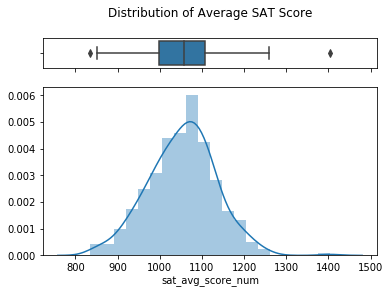

In [20]:
import seaborn as sns
import matplotlib.pyplot as ply

# Adapted from https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/

# Cut the window in 2 parts
f, (ax_box, ax_hist) = ply.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part

box = sns.boxplot(ml_hs_2017_final["sat_avg_score_num"], ax=ax_box)
dist = sns.distplot(ml_hs_2017_final["sat_avg_score_num"], ax=ax_hist)

box.set_title("Distribution of Average SAT Score\n")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

ply.show()

In [16]:
ml_hs_2017_final.describe()

,student_num,lea_avg_student_num,st_avg_student_num,09_Size,10_Size,11_Size,12_Size,Biology_Size,English II_Size,Math I_Size,...,SRC_Grades_Devices_Sent_Home_10:11:12,SRC_Grades_Devices_Sent_Home_10:11:12:13,SRC_Grades_Devices_Sent_Home_6:07:08,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12,SRC_Grades_Devices_Sent_Home_8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10,SRC_Grades_Devices_Sent_Home_9:10:11,SRC_Grades_Devices_Sent_Home_9:10:11:12,SRC_Grades_Devices_Sent_Home_9:10:11:12:13,unit_code
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,908.121140,845.624703,838.653207,19.066508,18.615202,18.555819,17.228029,18.866983,19.866983,18.612827,...,0.004751,0.004751,0.004751,0.002375,0.002375,0.002375,0.016627,0.273159,0.059382,513395.256532
std,579.128176,346.789646,84.135171,6.847338,7.723135,7.720403,8.246804,4.960931,4.864975,4.992826,...,0.068842,0.068842,0.068842,0.048737,0.048737,0.048737,0.128022,0.446112,0.236620,281496.468476
min,67.000000,164.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10303.000000
25%,426.000000,617.000000,853.000000,17.000000,17.000000,16.000000,15.000000,16.000000,17.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,280316.000000
50%,828.000000,815.000000,853.000000,20.000000,20.000000,21.000000,19.000000,19.000000,20.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,491312.000000
75%,1250.000000,974.000000,853.000000,23.000000,23.000000,24.000000,23.000000,22.000000,23.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,780325.000000
max,2966.000000,1852.000000,853.000000,33.000000,52.000000,30.000000,36.000000,30.000000,30.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,995330.000000


# Explore Joint Attributes

We looked at joint attributes to determine relationships with the *sat_avg_num_score* as preparation for future classification prediction. Pearson's *r* was calculated and several visualizations were performed to compare values that fall within our derived categorical variable, *sat_avg_level*. Many of the most correlated variables were ACT score related, which suggests that aptitude in one standardized assessment may be associated with aptitude in other standardized asssessments.

The following variables were examined in relationship to average SAT Score:<br>
<br>

| Attribute | Definition |
|:---|:---|
| *Gr_9_Pct_Prof* | The percentage of test takers at a 9th grade proficiency level. |
| *pct_eds* | The percentage of economically disadvantaged students. |
| *SPG Score* | School Performance Grade. |
| *EOCSubjects_CACR_All* | End of Course grades across all subjects for all College and Career Ready students. |
| *EOCEnglish2_CACR_Female* | End of Course English 2 grades for female College and Career Ready students. |
| *BlackPct* | Percentage of the school's population identified as Black or African American. |
| *short_susp_per_c_num* | Percentage of short-term suspensions per 100 students at the school level. |
| *flicensed_teach_pct* | Percentage of teachers that meet NC fully licensed definition at the school level. |
| *EOCMathI_CACR_Male* | End of Course Math 1 grades for male College and Career Ready students. |
| *MinorityPct* | Percentage of students identified as belonging to a demographic minority. |
| *lateral_teach_pct* | Lateral entry teacher percentage at the school level. |
| *EOCEnglish2_CACR_Male* | End of Course English 2 grades for male College and Career Ready students. |

In [21]:
# derive the absolute pearson's r for correlation, convert to dataframe

abs_correlation_ml_final = ml_hs_2017_final.corr(method='pearson').abs()
abs_correlation_ml_final = pd.DataFrame(abs_correlation_ml_final)

# abs_correlation_ml_final.to_csv(path_or_buf='./abs_correlation_ml_final.csv', sep=',')

In [22]:
import pandas as pd

# sort the correlation results to determine variables with strong correlation to sat_avg_score_num

sat_correlation = abs_correlation_ml_final.sort_values(by='sat_avg_score_num',ascending=False)
print(sat_correlation['sat_avg_score_num'])

sat_avg_score_num                                1.000000
ACTMath_ACTBenchmark_All                         0.811782
ACTScience_ACTBenchmark_All                      0.810282
ACTScience_ACTBenchmark_Female                   0.804678
ACTReading_ACTBenchmark_Female                   0.800335
ACTMath_ACTBenchmark_Female                      0.798479
ACTEnglish_ACTBenchmark_Female                   0.783960
ACT Score                                        0.770429
ACTCompositeScore_UNCMin_Female                  0.751481
ACTMath_ACTBenchmark_Male                        0.741138
ACTScience_ACTBenchmark_Male                     0.730289
Gr_9_Pct_Prof                                    0.728958
ACTMath_ACTBenchmark_White                       0.727064
pct_eds                                          0.723033
ACTScience_ACTBenchmark_White                    0.713823
ACTSubtests_BenchmarksMet_AIG                    0.713463
SPG Score                                        0.704620
EOCSubjects_CA

The below violinplot (with internal swarmplot) shows the approximately normal distribution of the **sat_avg_score_num** attribute.

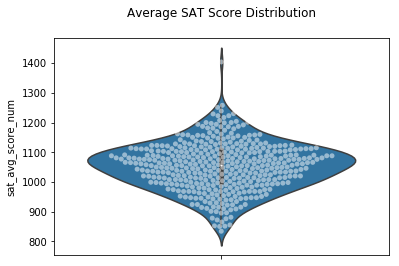

In [26]:
import seaborn as sns
import matplotlib.pyplot as ply

sat_violin = sns.violinplot( y=ml_hs_2017_final["sat_avg_score_num"])
sat_swarm = sns.swarmplot(y="sat_avg_score_num", data=ml_hs_2017_final, color="w", alpha=.5);

sat_violin.set_title("Average SAT Score Distribution\n")
ply.show()

This regression plot shows the strong correlation between **sat_avg_score** and **ACTMATH_ACTBenchmark_All**.

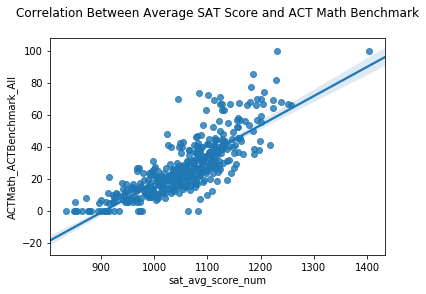

In [27]:
import seaborn as sns
import matplotlib.pyplot as ply

sat_actmath = sns.regplot(x="sat_avg_score_num", y="ACTMath_ACTBenchmark_All", x_jitter=.05, data=ml_hs_2017_final)
sat_actmath.set_title("Correlation Between Average SAT Score and ACT Math Benchmark\n")
ply.show()

The countplot below, equivalent to a histogram for categorical variables, illustrates the frequency of schools in the three levels of our derived categorical attribute. This is a clear representation how the bulk of schools fall within the *Medium* range.

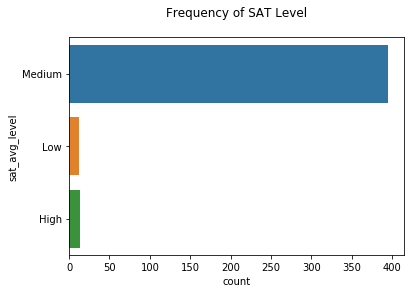

In [28]:
import seaborn as sns
import matplotlib.pyplot as ply

sat_level = sns.countplot(y=ml_hs_2017_final["sat_avg_level"])
sat_level.set_title("Frequency of SAT Level\n")
ply.show()

This swarmplot shows that there are some clearly identifiable associations between a given school's 9th grade level proficiency and their average SAT score. This shows a positive correlation wherein high 9th grade level proficiency is associated with a high SAT score.

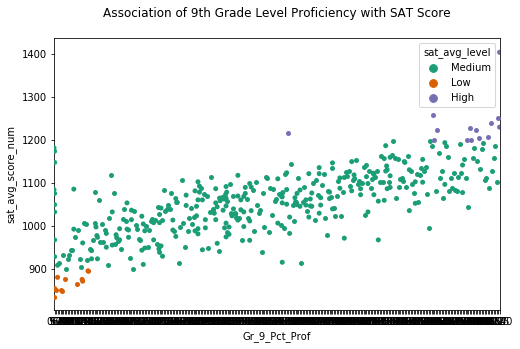

In [30]:
import seaborn as sns
import matplotlib.pyplot as ply

f, ax = ply.subplots(figsize=(8, 5))
sat_9th = sns.swarmplot(x="Gr_9_Pct_Prof",y="sat_avg_score_num",hue="sat_avg_level", data=ml_hs_2017_final, palette="Dark2", ax=ax)
sat_9th.set_title("Association of 9th Grade Level Proficiency with SAT Score\n")
ply.show()

This strip plot illustrates the negative correlation between SAT score and the school's percentage of economically disadvantaged students. Higher SAT scores appear to be associated with lower percentages of economically disadvantaged students.

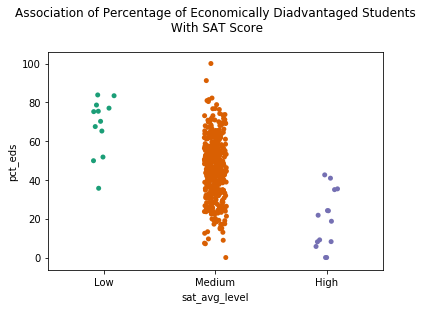

In [37]:
import seaborn as sns
import matplotlib.pyplot as ply

sat_eds = sns.stripplot(x="sat_avg_level", y="pct_eds",jitter=True, order=['Low','Medium','High'], data=ml_hs_2017_final, palette="Dark2")
sat_eds.set_title("Association of Percentage of Economically Diadvantaged Students\n With SAT Score\n")
ply.show()

These box plots illustrate the positive correlation and fairly normal distribution of SPG Score with SAT level. Schools with the highest school performance grade tend to have higher SAT scores.

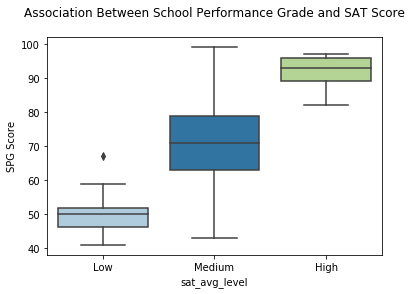

In [39]:
import seaborn as sns
import matplotlib.pyplot as ply

sat_SPG = sns.boxplot(x="sat_avg_level", y="SPG Score", order=['Low','Medium','High'], data=ml_hs_2017_final, palette="Paired")
sat_SPG.set_title("Association Between School Performance Grade and SAT Score\n")
ply.show()

These violin plots show the positive correlation between SAT score and all EOC subjects for College and Career Ready students. Although there are some regions of overlap, the violin plot is well-suited to illustrate that the bulk of higher SAT scores are associated with higher EOC scores, as are lower SAT scores with lower EOC scores. Schools with medium-range SAT scores are likewise associated with mid-range EOC scores.

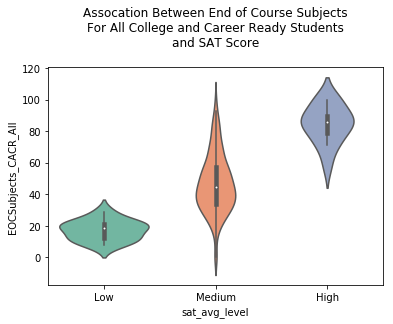

In [44]:
import seaborn as sns
import matplotlib.pyplot as ply

sat_eoc_cacr = sns.violinplot(x="sat_avg_level", y="EOCSubjects_CACR_All", order=['Low','Medium','High'], data=ml_hs_2017_final, palette="Set2")
sat_eoc_cacr.set_title("Assocation Between End of Course Subjects\nFor All College and Career Ready Students\nand SAT Score\n")
ply.show()

The correlogram below illustrates, via scatter plot matrix, the correlation between *Gr_9_Pct_Prof*, *pct_eds*, *SPG Score*, and *EOCSubjects_CACR_All* with average SAT score. SAT score is positively correlated with 9th grade proficiency, school performance grade, and EOC subject grades with college and career ready students. SAT score is negatively correlated with the percentage of economically disadvantaged students.

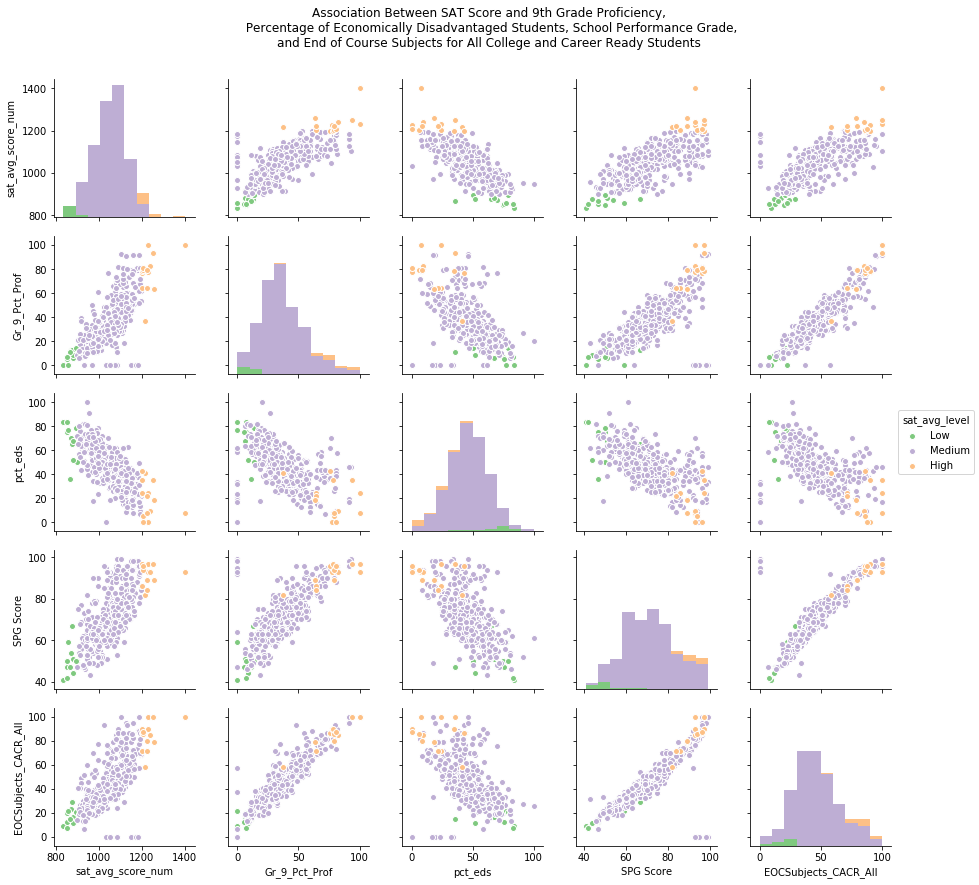

In [57]:
import seaborn as sns
import matplotlib.pyplot as ply

df = ml_hs_2017_final[['sat_avg_score_num','Gr_9_Pct_Prof','pct_eds','SPG Score','EOCSubjects_CACR_All','sat_avg_level']]

# Basic correlogram
sat_pairplot1 = sns.pairplot(df, hue="sat_avg_level", hue_order=['Low','Medium','High'], palette="Accent")
ply.subplots_adjust(top=0.9)
sat_pairplot1.fig.suptitle("Association Between SAT Score and 9th Grade Proficiency,\n Percentage of Economically Disadvantaged Students, School Performance Grade,\nand End of Course Subjects for All College and Career Ready Students\n")

ply.show()

The following correlogram illustrates, via scatter plot matrix, the correlation between *EOCEnglish2_CACR_Female*, *BlackPct*, *short_susp_per_c_num*, and *flicensed_teach_pct* with average SAT score. SAT score is positively associated with English 2 end of course scores among college and career ready females, as well as the percentage of fully licensed teachers. SAT scores are negatively correlated with the percentage of student demographics identifying as Black/African American, as well as the number of short-term suspensions per 100 students.

Note that the correlation, as identified above with Pearson's *r* coefficients, is not as strong in this subset of attributes as in the previous subset.

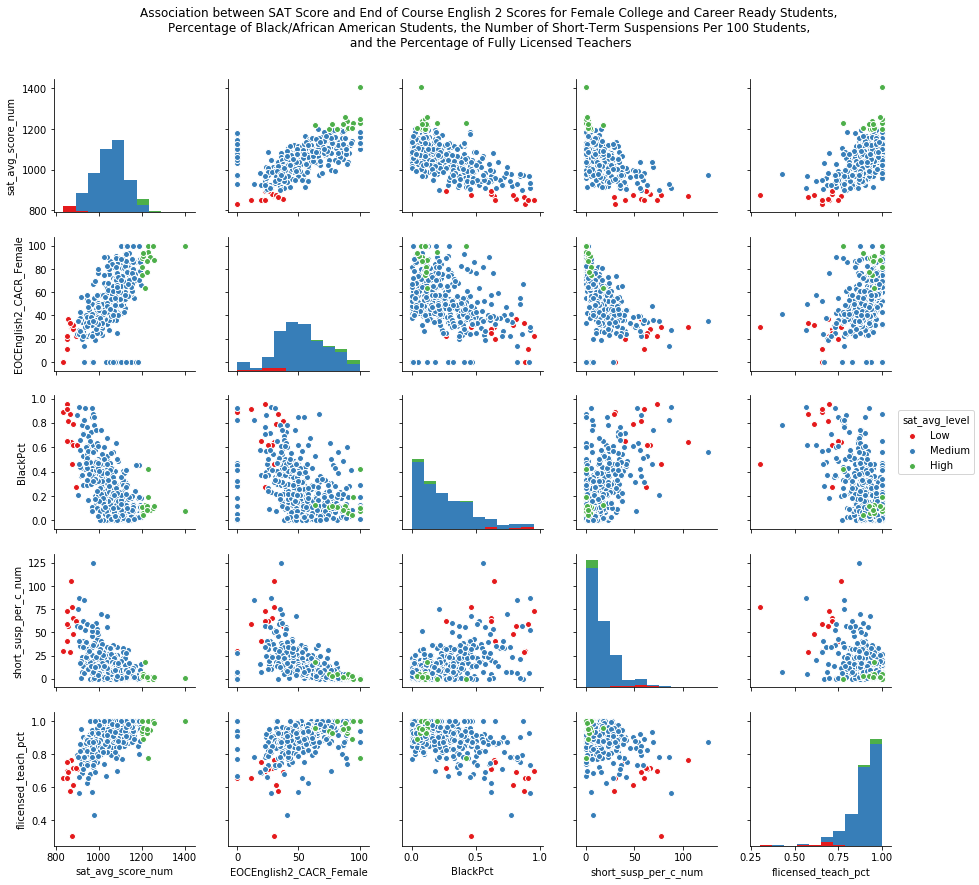

In [58]:
import seaborn as sns
import matplotlib.pyplot as ply

df2 = ml_hs_2017[['sat_avg_score_num','EOCEnglish2_CACR_Female','BlackPct','short_susp_per_c_num','flicensed_teach_pct','sat_avg_level']]
# Basic correlogram

sat_pairplot2=sns.pairplot(df2,hue="sat_avg_level", hue_order=['Low','Medium','High'], palette="Set1")
ply.subplots_adjust(top=0.9)
sat_pairplot2.fig.suptitle("Association between SAT Score and End of Course English 2 Scores for Female College and Career Ready Students,\nPercentage of Black/African American Students, the Number of Short-Term Suspensions Per 100 Students,\n and the Percentage of Fully Licensed Teachers\n")
ply.show()

The following correlogram illustrates, via scatter plot matrix, the correlation between *EOCMathI_CACR_Male*, *MinorityPct*, *lateral_teach_pct*, and *EOCEnglish2_CACR_Male* with average SAT score. SAT score is positively associated with Math 1 end of course scores among college and career ready males, as well as with English 2 end of course scores among college and career ready males. SAT scores are negatively correlated with the percentage of student demographics identifying as members of a minority, as well as the lateral entry teacher percentage at the school level.

Note that the correlation, as identified above with Pearson's *r* coefficients, is not as strong in this subset of attributes as in the previous two subsets.

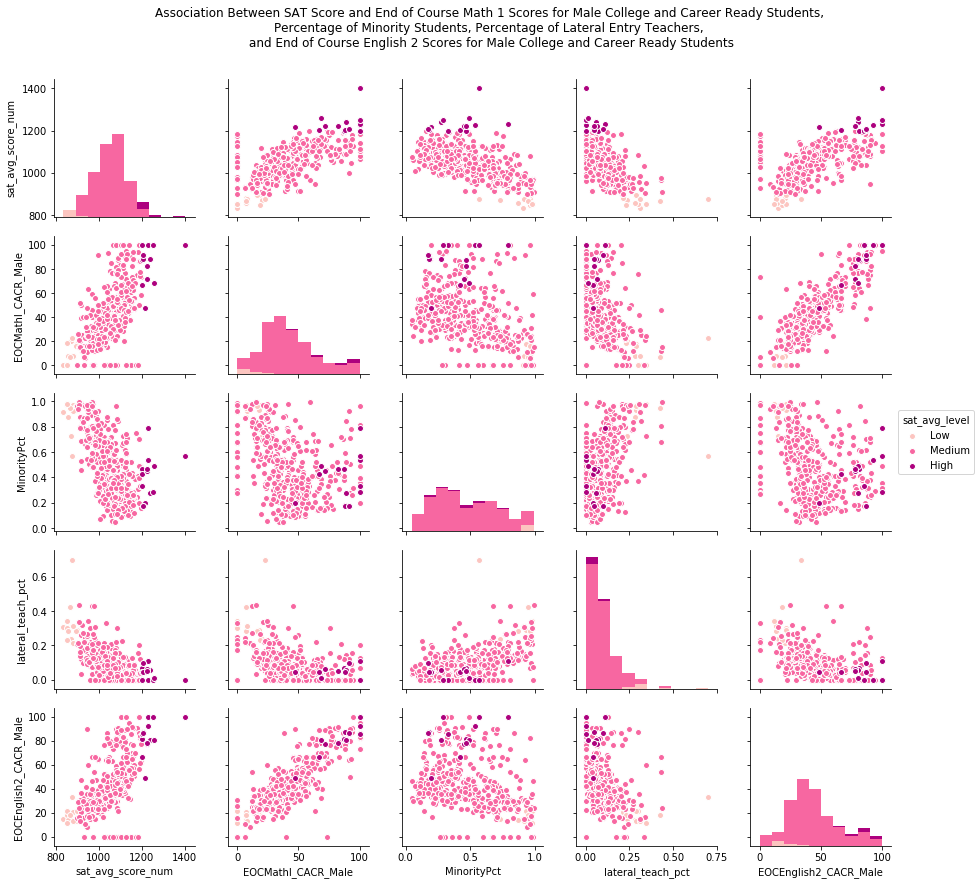

In [59]:
import seaborn as sns
import matplotlib.pyplot as ply

df3 = ml_hs_2017[['sat_avg_score_num','EOCMathI_CACR_Male','MinorityPct','lateral_teach_pct','EOCEnglish2_CACR_Male','sat_avg_level']]
# Basic correlogram

sat_pairplot3=sns.pairplot(df3,hue="sat_avg_level", hue_order=['Low','Medium','High'], palette="RdPu")
ply.subplots_adjust(top=0.9)
sat_pairplot3.fig.suptitle("Association Between SAT Score and End of Course Math 1 Scores for Male College and Career Ready Students,\nPercentage of Minority Students, Percentage of Lateral Entry Teachers,\n and End of Course English 2 Scores for Male College and Career Ready Students\n")
ply.show()